In [1]:
from manim import *
import pandas as pd

Manim Community v0.17.2

In [2]:
INPUT_FILE_PATH = "../TP1/data/example_input.txt"
OUTPUT_FILE_PATH = "../TP1/data/output.txt"

with open(INPUT_FILE_PATH, 'r') as f:
    N = int(f.readline().rstrip())
    L = int(f.readline().rstrip())
    M = int(f.readline().rstrip())
    Rc = float(f.readline().rstrip())

particles_df = pd.read_table(
    INPUT_FILE_PATH,
    delim_whitespace=True,
    names=["id ", "x", "y", "r"],
    skiprows=4
)

with open(OUTPUT_FILE_PATH) as f:
    target_neighbours_ids = {k: v for k, *v in (line.split() for line in f.readlines())}

In [8]:
print(f"""N={N}, L={L}, M={M}, Rc={Rc}""")
print("L/M > Rc:", L/M > Rc)
max_radius = particles_df['r'].max()
print("L/M > Rc + 2 * max_radius:", L/M > Rc + 2 * max_radius)
particles_df

N=500, L=100, M=8, Rc=10.0
L/M > Rc: True
L/M > Rc + 2 * max_radius: False


,id,x,y,r
0,0,61.777824,25.943040,1.848804
1,1,43.600472,7.292513,2.982511
2,2,90.274287,67.932019,1.131299
3,3,47.538905,90.524045,0.826762
4,4,59.584733,22.778332,0.881897
...,...,...,...,...
495,495,89.258785,39.200531,1.624603
496,496,56.828411,42.078582,2.442366
497,497,79.075868,43.670433,0.698447
498,498,4.849657,4.441543,1.233440


In [4]:
# out_particles_df

In [7]:
# TODO: agarar del archivo los vecinos de forma correcta y pasarlo a un diccionario de listas
# target_neighbours_ids = out_particles_df.loc[out_particles_df.iloc[1] == "TARGET_PARTICLE_ID"]
# target_neighbours_ids

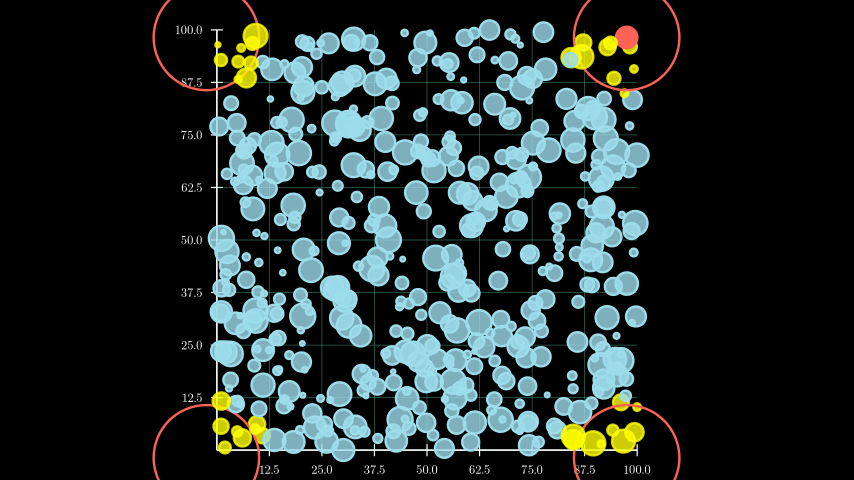

In [6]:
%%manim --progress_bar display -ql -v WARNING CellIndexMethodScene

TARGET_PARTICLE_ID = "219"

class CellIndexMethodScene(Scene):
    
    def construct(self):
        self.add(self.axes, self.domain, *self.particles)
        
    @property
    def particles(self):
        particles = []
        text = []
        for _, row in particles_df.iterrows():
            alpha = self.axes.c2p(1,0)[0] - self.axes.c2p(0,0)[0]
            scalated_radius = row["r"] * alpha
            current_id = str(int(row[0]))
            if current_id == TARGET_PARTICLE_ID:
                particle = Circle(radius=scalated_radius, color=RED, fill_opacity=1).move_to(self.axes.c2p(row["x"], row["y"], 0))
                for y in [-1, 0, 1]:
                    for x in [-1, 0, 1]:
                        particles.append(Circle(radius=(Rc + row["r"]) * alpha, color=RED).move_to(self.axes.c2p(row["x"] + L * x, row["y"] + L * y, 0)))
            elif current_id in target_neighbours_ids[TARGET_PARTICLE_ID]:
                particle = Circle(radius=scalated_radius, color=YELLOW, fill_opacity=0.8, stroke_opacity=0.8).move_to(self.axes.c2p(row["x"], row["y"], 0))
            else:
                particle = Circle(radius=scalated_radius, color=BLUE_B, fill_opacity=0.8).move_to(self.axes.c2p(row["x"], row["y"], 0))
            # text.append(Text(current_id, font_size=16, weight=BOLD).move_to(self.axes.c2p(row["x"], row["y"], 0)))
            particles.append(particle)
        return particles + text
    
    @property
    def domain(self):
        return NumberPlane(
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 1,
                "stroke_opacity": 0.6
            },
            x_range=self.cels_tuple,
            y_range=self.cels_tuple,
            x_length=7,
            y_length=7,
        )
        
    @property
    def axes(self):
        return Axes(
            x_range=self.cels_tuple,
            y_range=self.cels_tuple,
            x_length=7,
            y_length=7,
            axis_config={
                "font_size": 20,
            },
            tips=False,
        ).add_coordinates()

        
    @property
    def cels_tuple(self):
        """
        The number of cels is defined by M*M, 
        this vector represents the [x_min, x_max, x_step]
        """
        return [0, L, L / M]
